In [107]:
import numpy as np
from readFields import read_data
varList=['qv','qc','qr','qi','qs','qg','th','qv_new','qc_new','qr_new','qi_new',\
         'qs_new','qg_new','th_new','press','dz']
import pickle
import numpy as np
inputScalers=pickle.load(open("inputScalers_1M_cell.pkl","rb"))
outputScalers=pickle.load(open("outputScalers_1M_cell.pkl","rb"))
import sys
sys.path.append("/Users/mgrecu/WDomains/MCS_OK")
from fscale import fscale1,update_var1, fscale1d,update_var1d
inputVars=["qv","qc","qr","qi","qs","qg","temp","press","dz"]
outputVars=["qv_tend","qc_tend","qr_tend","qi_tend","qs_tend","qg_tend","temp_tend"]
qcm,qcs=inputScalers["qc"]
qrm,qrs=inputScalers["qr"]
qim,qis=inputScalers["qi"]
qsm,qss=inputScalers["qs"]
qgm,qgs=inputScalers["qg"]
qvm,qvs=inputScalers["qv"]
from keras.models import load_model
#define mlp model with 9 inputs, 2 hidden layers with 64 neurons and 7 outputs.
#
from keras.models import Sequential
from keras.layers import Dense
def mlp_model():
    model = Sequential()
    model.add(Dense(64, input_dim=9, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    
model=mlp_model()

itemp=varList.index('th')
ipress=varList.index('press')
iqc=varList.index('qc')
iqc_new=varList.index('qc_new')
iqi=varList.index('qi')
iqi_new=varList.index('qi_new')
iqv=varList.index('qv')
iqv_new=varList.index('qv_new')
iqr=varList.index('qr')
iqr_new=varList.index('qr_new')
iqg=varList.index('qg')
iqg_new=varList.index('qg_new')
iqs=varList.index('qs')
iqs_new=varList.index('qs_new')
ind=np.sort([iqc,iqr,iqi,iqs,iqg,iqc_new,iqr_new,iqi_new,iqs_new,iqg_new])
#unet1D_MP_model_1M_gc.h5
xL=[]
yL=[]
for itile in range(9):
    for itime in range(3):
        fname='tile_%2.2i/output%3.3i.bin'%(itile+1,itime+1)
        dims=open('tile_%2.2i/output%3.3i'%(itile+1,itime+1),'r').readline().split()
        nx=int(dims[0])
        ny=int(dims[1])
        nz=72
        fields=read_data(fname, nx,ny)
        outVars=[]
        x1L=[]
        y1L=[]
        a=np.nonzero(fields[ind,:,:,:].sum(axis=0)>0)
        for var in inputVars:
    #find index of var in varList
            if var!='temp':
                ivar=varList.index(var)
                if var=='press' or var=='dz':
                    ivar_new=ivar
                else:
                    ivar_new=varList.index(var+'_new')
            else:
                ivar=varList.index('th')
                ivar_new=varList.index('th_new')
            if var=='press' or var=='dz':
                ivar_new=ivar
            print(ivar,var,varList[ivar],varList[ivar_new])
            if var=='temp':
                fields[ivar,:,:,:]=fields[ivar,:,:]*(fields[14,:,:,:]/1e5)**(287/1004)
                fields[ivar_new,:,:,:]=fields[ivar_new,:,:,:]*(fields[14,:,:,:]/1e5)**(287/1004)
            x1L.append(fields[ivar,:,:][a])
            if(ivar!=ivar_new):
                y1L.append((fields[ivar_new,:,:,:]-fields[ivar,:,:,:])[a])
                outVars.append(var+'_tend')
        xL.extend(np.array(x1L).transpose())
        yL.extend(np.array(y1L).transpose())



 tile_01/output001.bin
0 qv qv qv_new
1 qc qc qc_new
2 qr qr qr_new
3 qi qi qi_new
4 qs qs qs_new
5 qg qg qg_new
6 temp th th_new
14 press press press
15 dz dz dz
 tile_01/output002.bin
0 qv qv qv_new
1 qc qc qc_new
2 qr qr qr_new
3 qi qi qi_new
4 qs qs qs_new
5 qg qg qg_new
6 temp th th_new
14 press press press
15 dz dz dz
 tile_01/output003.bin
0 qv qv qv_new
1 qc qc qc_new
2 qr qr qr_new
3 qi qi qi_new
4 qs qs qs_new
5 qg qg qg_new
6 temp th th_new
14 press press press
15 dz dz dz
 tile_02/output001.bin
0 qv qv qv_new
1 qc qc qc_new
2 qr qr qr_new
3 qi qi qi_new
4 qs qs qs_new
5 qg qg qg_new
6 temp th th_new
14 press press press
15 dz dz dz
 tile_02/output002.bin
0 qv qv qv_new
1 qc qc qc_new
2 qr qr qr_new
3 qi qi qi_new
4 qs qs qs_new
5 qg qg qg_new
6 temp th th_new
14 press press press
15 dz dz dz
 tile_02/output003.bin
0 qv qv qv_new
1 qc qc qc_new
2 qr qr qr_new
3 qi qi qi_new
4 qs qs qs_new
5 qg qg qg_new
6 temp th th_new
14 press press press
15 dz dz dz
 tile_03/output001.bin

In [108]:
print(outVars)
print(inputVars)


['qv_tend', 'qc_tend', 'qr_tend', 'qi_tend', 'qs_tend', 'qg_tend', 'temp_tend']
['qv', 'qc', 'qr', 'qi', 'qs', 'qg', 'temp', 'press', 'dz']


In [109]:
xL=np.array(xL)
yL=np.array(yL)
print(xL.mean(axis=0),xL.std(axis=0))
#


[3.3028284e-03 1.3988850e-05 1.4606135e-05 2.4927071e-05 4.7430305e-05
 1.0704100e-04 2.4959442e+02 4.2325812e+04 2.4561086e+02] [5.2003614e-03 1.2808167e-04 1.6803812e-04 1.2337242e-04 1.9016213e-04
 7.1647158e-04 3.1765373e+01 2.6031832e+04 5.2455593e+01]


In [110]:
#import scalers
#scale input
from sklearn.preprocessing import StandardScaler
scalerX=StandardScaler()
scalerY=StandardScaler()
xscaled=scalerX.fit_transform(xL)
yscaled=scalerY.fit_transform(yL)
#import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xscaled, yscaled, test_size=0.2, random_state=42)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 5255 (20.53 KB)
Trainable params: 5255 (20.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
history=model.fit(x_train,y_train,epochs=10,batch_size=100,validation_data=(x_test,y_test)) 

Epoch 1/10
14961/14961 [==============================] - 11s 711us/step - loss: 0.4592 - val_loss: 0.3219
Epoch 2/10
14961/14961 [==============================] - 11s 704us/step - loss: 0.3230 - val_loss: 0.2687
Epoch 3/10
14961/14961 [==============================] - 11s 703us/step - loss: 0.2893 - val_loss: 0.3867
Epoch 4/10
14961/14961 [==============================] - 10s 702us/step - loss: 0.2704 - val_loss: 0.2615
Epoch 5/10
14961/14961 [==============================] - 11s 703us/step - loss: 0.2628 - val_loss: 0.2414
Epoch 6/10
14961/14961 [==============================] - 11s 705us/step - loss: 0.2540 - val_loss: 0.2728
Epoch 7/10
14961/14961 [==============================] - 10s 701us/step - loss: 0.2455 - val_loss: 0.2656
Epoch 8/10
14961/14961 [==============================] - 11s 702us/step - loss: 0.2368 - val_loss: 0.2270
Epoch 9/10
14961/14961 [==============================] - 10s 700us/step - loss: 0.2344 - val_loss: 0.2054
Epoch 10/10
14961/14961 [============

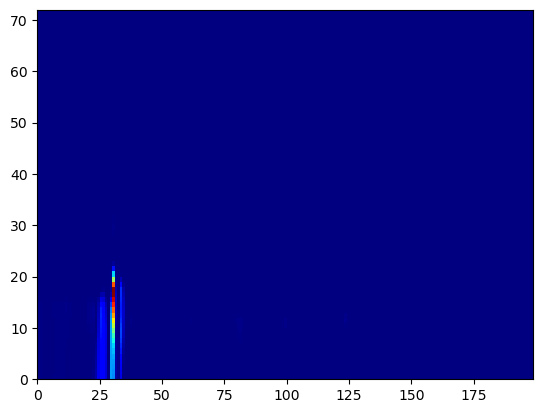

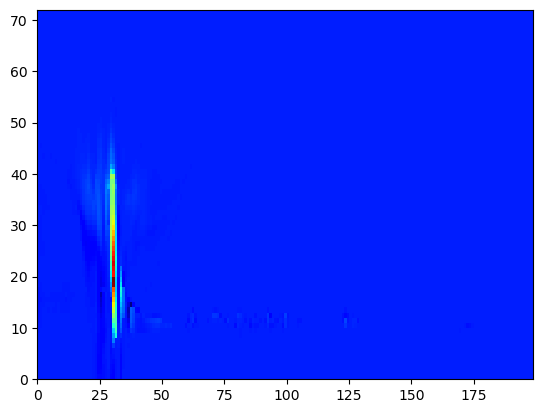

In [114]:
plt.pcolormesh(fields[2,:,:,10].T,cmap='jet')
plt.figure()
plt.pcolormesh((fields[13,:,:,10]-fields[6,:,:,10]).T,cmap='jet')

: 

: 

In [115]:
model.save("mp_model_0d.h5")

/Users/mgrecu/miniconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
xinput=[ -6.06660619E-02,  -4.95523401E-02, -0.110201314,    -0.138018325,      -8.25610980E-02,  0.328399539,\
               1.40543187,       1.52716160,      1.10277939]
xinput=[ -6.06659576E-02,  -4.95505370E-02, -0.110201314,     -0.138018325 ,     -8.25610980E-02,  0.351970166,
             -0.651567221,     -0.712960541 ,      4.20613103E-02]
#xinput=[ -4.76468280E-02,  0.248610601,     -0.103829496 ,     0.422248989,      -8.21322426E-02,
#          0.647349715,      0.871282458 ,     0.952619076,      0.419463575]   
xinput=[ -6.06619269E-02,  -4.79406975E-02, -0.110201128,     -0.121057831,\
              -6.16144426E-02,  0.149291933,      0.269526869,      0.715923786,\
                            0.240183070 ]
xinput=np.array(xinput)[np.newaxis,:]
yout=model.predict(xinput)
print(yout)
#print(xinput)

1/1 [==============================] - 0s 14ms/step
[[-0.04605138 -0.10046151  0.01557901  0.0024309  -0.08582917  0.17795087
  -0.18902014]]


In [116]:
print([v for v in scalerX.mean_])
print([v for v in scalerX.scale_])
print([v for v in scalerY.mean_])
print([v for v in scalerY.scale_])

[0.003315005218148738, 1.3991694213505624e-05, 1.460830579877713e-05, 2.4933441397318293e-05, 4.743995609906075e-05, 0.0001070590156169587, 248.90307223405165, 42325.43806454194, 245.6880410989276]
[0.005188289465698395, 0.00012867134045073828, 0.00016844543890582057, 0.00012484716493930284, 0.00019047270694516342, 0.0007185409687322846, 31.769377267665877, 26040.11419624085, 52.57923401164694]
[-9.800165435953876e-07, -1.5075518595215102e-07, -1.7199690209827199e-07, 5.8635545128302734e-08, 1.323342222114488e-07, 1.299709084929269e-07, 0.002767458625174922]
[1.6866934204044486e-05, 1.72771219177893e-05, 2.402103196794837e-05, 1.0752144470956599e-05, 3.585489061213833e-06, 3.0273808704202674e-05, 0.04689521341170341]


In [79]:
for i in range(6):
    print(model.weights[i].shape)


(9, 64)
(64,)
(64, 64)
(64,)
(64, 7)
(7,)


In [81]:
import numpy as np

def initialize_weights_and_biases():
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_hidden = np.zeros(hidden_size)
    weights_hidden_hidden = np.random.randn(hidden_size, hidden_size)
    biases_hidden2 = np.zeros(hidden_size)
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_output = np.zeros(output_size)
    return weights_input_hidden, biases_hidden, weights_hidden_hidden, biases_hidden2, weights_hidden_output, biases_output

def relu(x):
    return np.maximum(0, x)

def forward_propagation(input_data, weights_input_hidden, biases_hidden, weights_hidden_hidden, biases_hidden2, weights_hidden_output, biases_output):
    hidden_layer1 = np.dot(input_data, weights_input_hidden) + biases_hidden
    hidden_layer1 = relu(hidden_layer1)
    
    hidden_layer2 = np.dot(hidden_layer1, weights_hidden_hidden) + biases_hidden2
    hidden_layer2 = relu(hidden_layer2)
    
    output_layer = np.dot(hidden_layer2, weights_hidden_output) + biases_output
    
    return output_layer

# MLP architecture
input_size = 9
hidden_size = 64
output_size = 7

# Initialize weights and biases
weights_input_hidden, biases_hidden, weights_hidden_hidden, biases_hidden2, weights_hidden_output, biases_output = \
     [ model.weights[i] for i in range(6)]

# Generate example input data (you need to provide actual input data)
input_data = xinput[0,:]

# Forward propagation
output_data = forward_propagation(input_data, weights_input_hidden, biases_hidden, weights_hidden_hidden, biases_hidden2, weights_hidden_output, biases_output)

print("Output:")
print(output_data)
print(yout)


Output:
tf.Tensor(
[-0.04605138 -0.10046151  0.01557901  0.0024309  -0.08582917  0.17795087
 -0.18902014], shape=(7,), dtype=float32)
[[-0.04605138 -0.10046151  0.01557901  0.0024309  -0.08582917  0.17795087
  -0.18902014]]


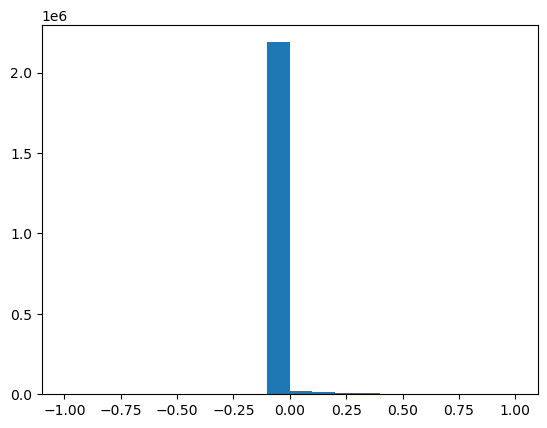

In [96]:
import matplotlib.pyplot as plt
h1=plt.hist(xscaled[:,1],bins=np.arange(21)*0.1-1)

In [84]:
np.savetxt('weights_input.txt',weights_input_hidden)
np.savetxt('biases_hidden.txt',biases_hidden)
np.savetxt('weights_hidden.txt',weights_hidden_hidden)
np.savetxt('biases_hidden2.txt',biases_hidden2)
np.savetxt('weights_output.txt',weights_hidden_output)
np.savetxt('biases_output.txt',biases_output)
